In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lmfit import Model
import plotly.express as px
import scipy.stats as stats
from tqdm.notebook import tqdm
from IPython.display import Image, Video

## Охлаждение
Жидкость из равновесного состояния $\rho = 0.98$ и $T=2.0$ охлаждается в термостате. Для этого каждые 5000 шагов по $\delta t=10^{-4}$ делается масштабирование скоростей на уменьшая температуру на 0.02. Таким образом, скорость охлаждения - $0.04$ ед.температуры/ед.времени.

In [2]:
Video("cell.mp4")

## Расщепление второго пика
Между 420000 и 440000 шагами симуляции наблюдается начало расщепления второго пика функции радиального распределения. Эти шаги соответствуют температурам $0.32$ и $0.24$ (между этими значениями расщепление исчезает, после них сохраняется и "углубляется"). Таким образом, температуру стеклования можно принять за $T_{g}=0.28$.

Это сходится с приведенной в задании работой J. Chem. Soc., Faraday Trans. 2, 1979,75, 1371-1387, где переход был получим этим методом на температуре $T_{g}=0.29$

In [3]:
Video("g.webm", width=900)

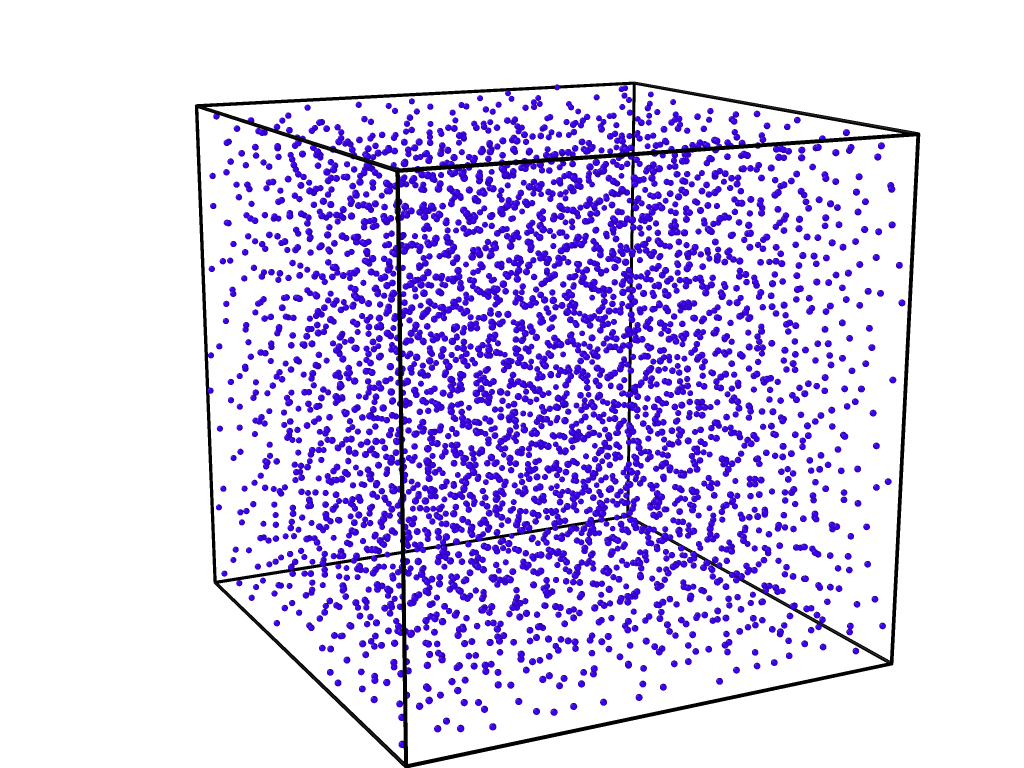

In [4]:
Image("c420.png")

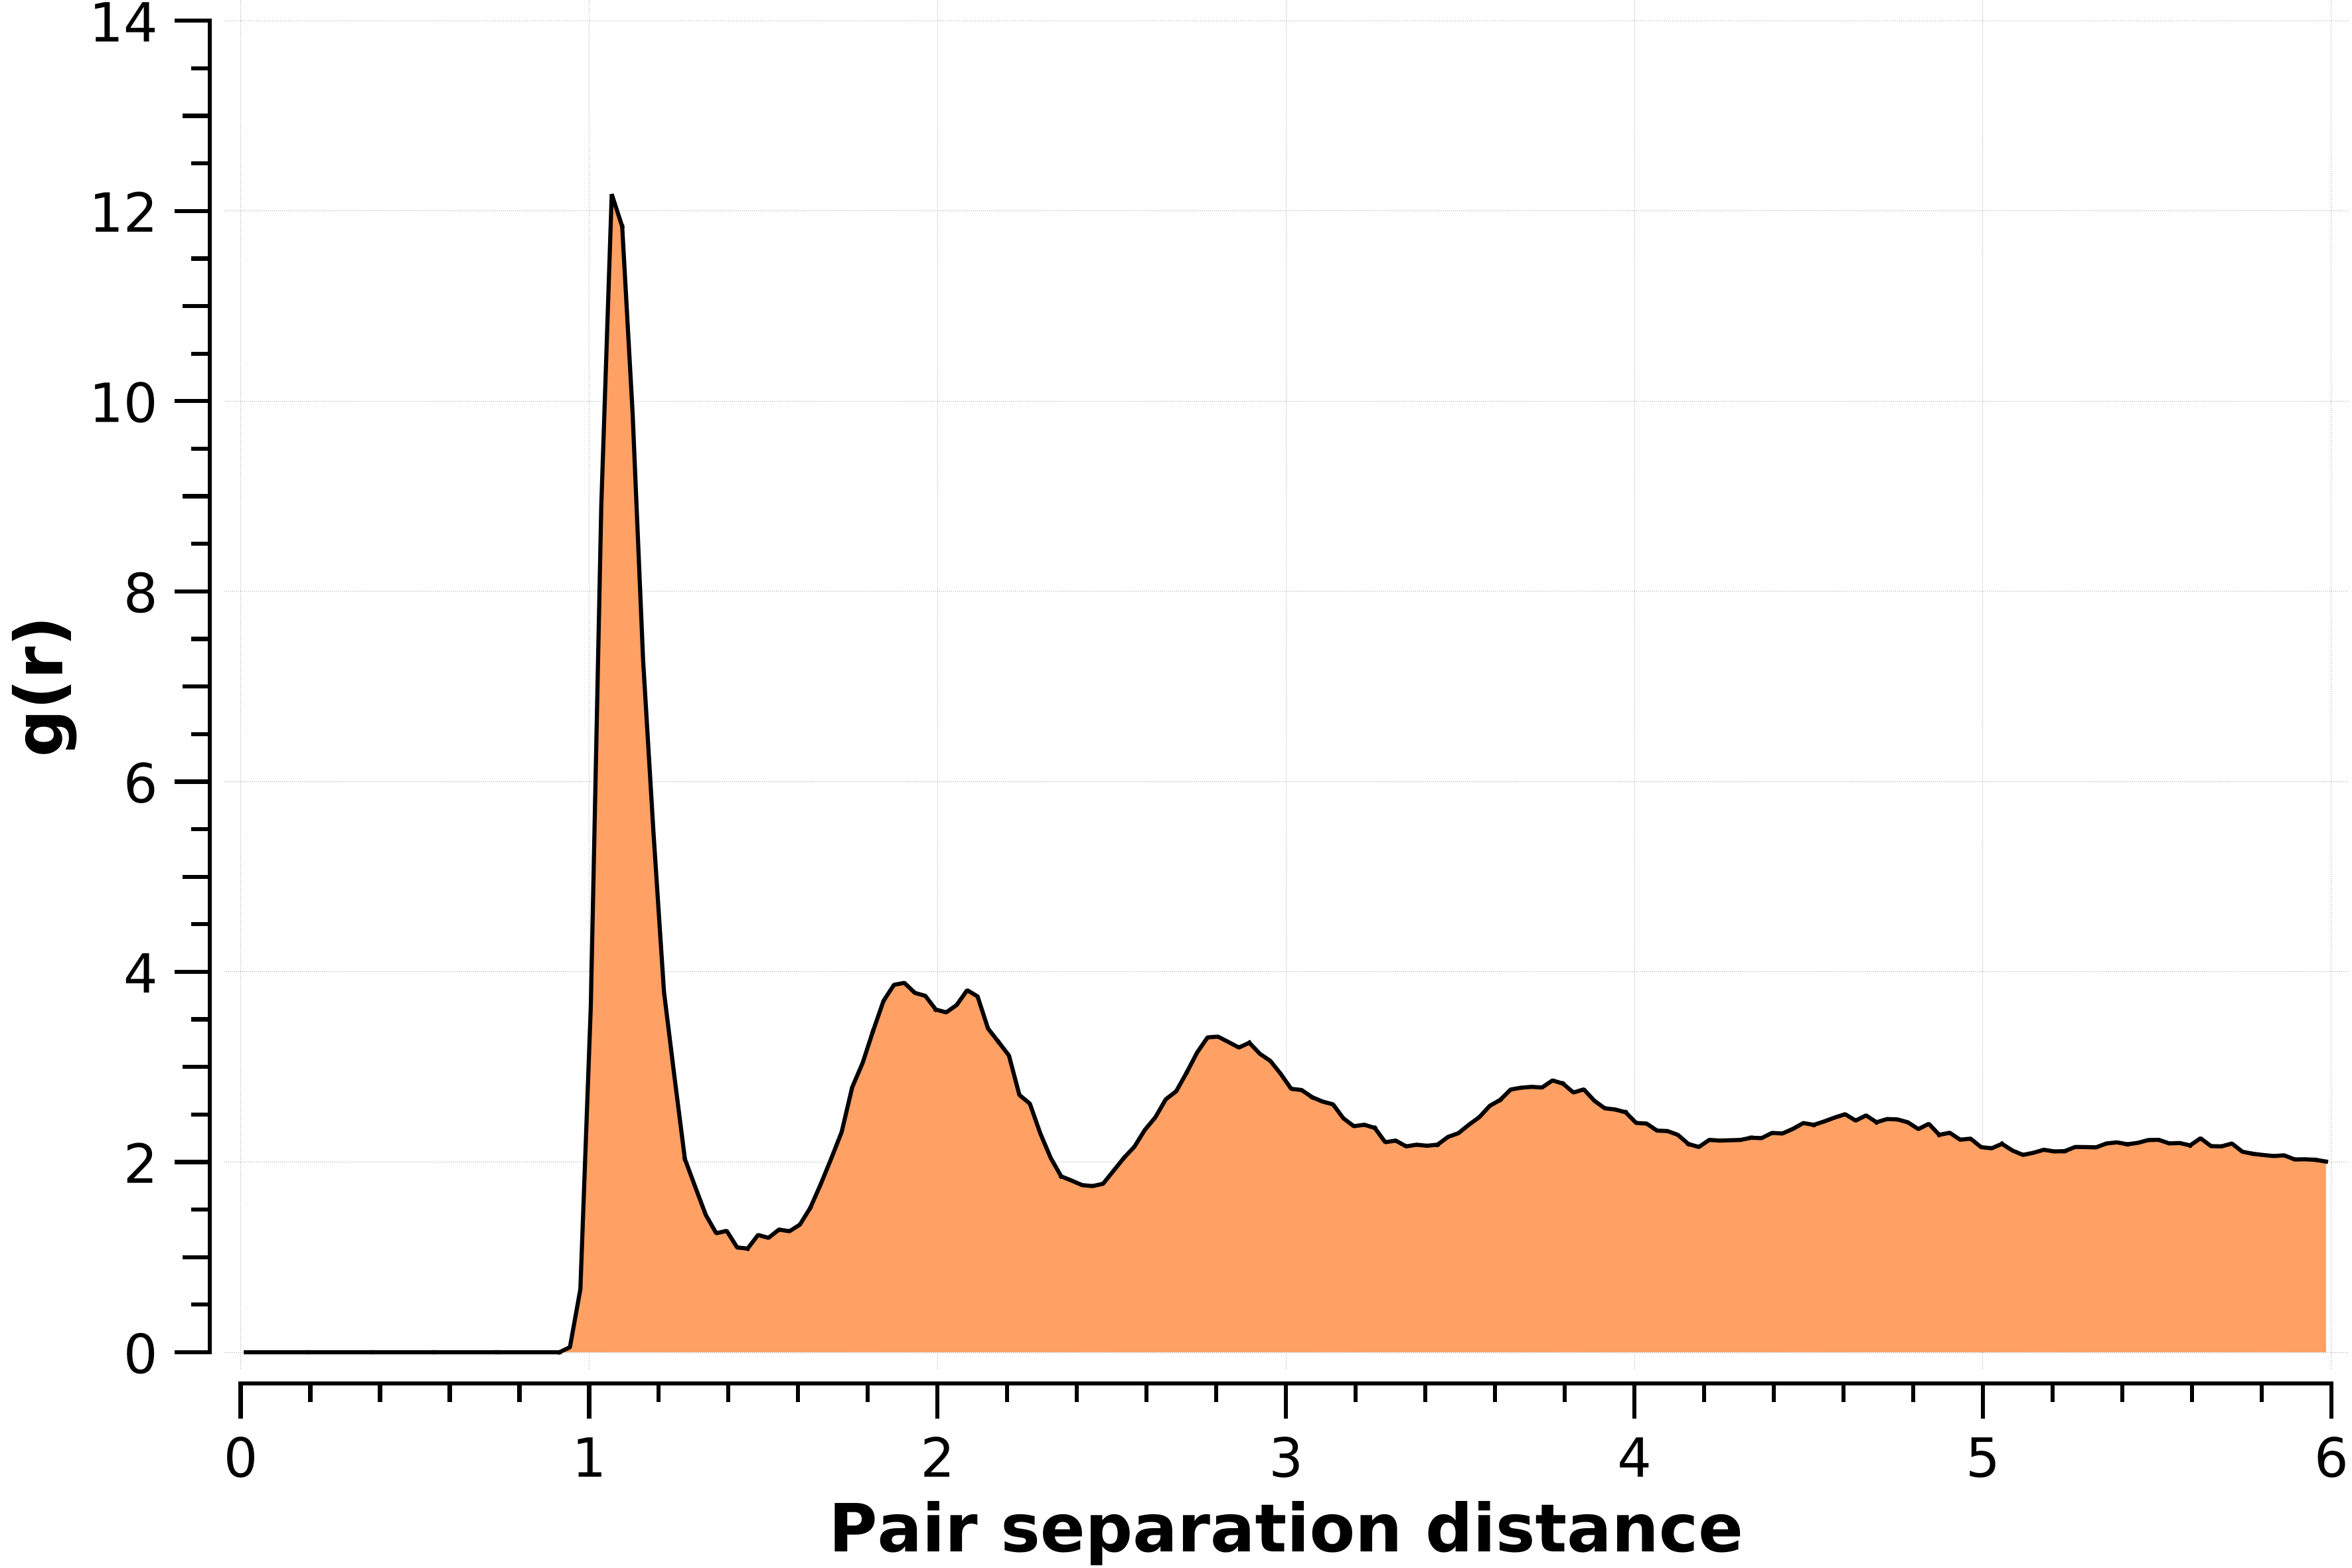

In [5]:
Image("g420.png")

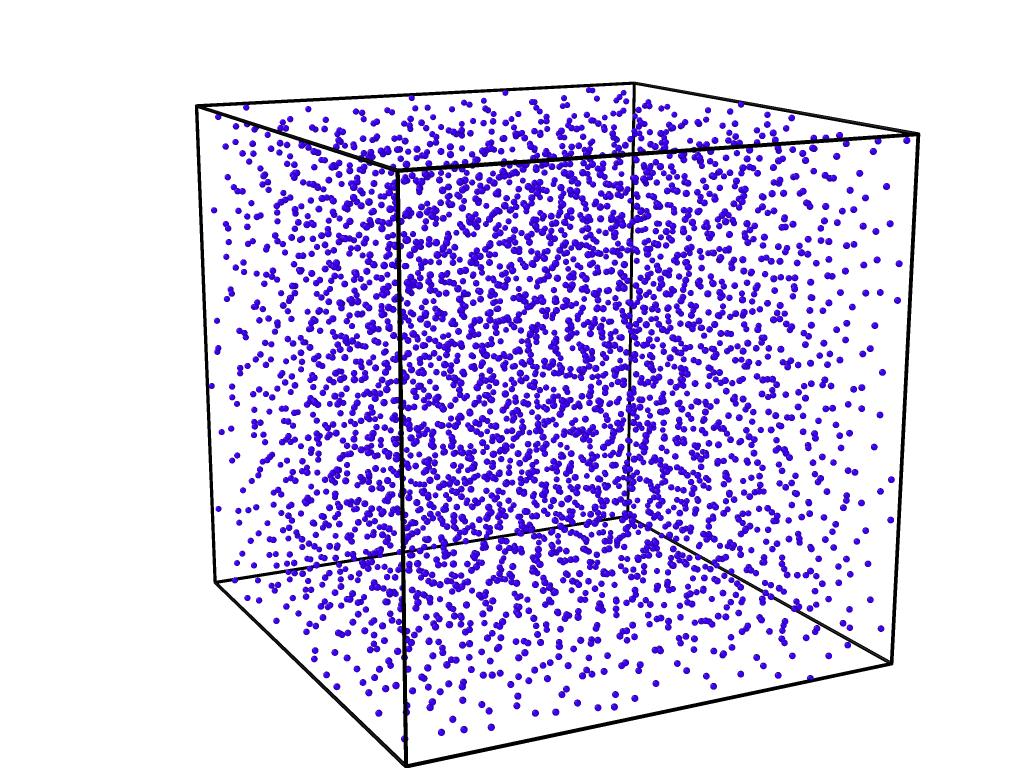

In [6]:
Image("c440.png")

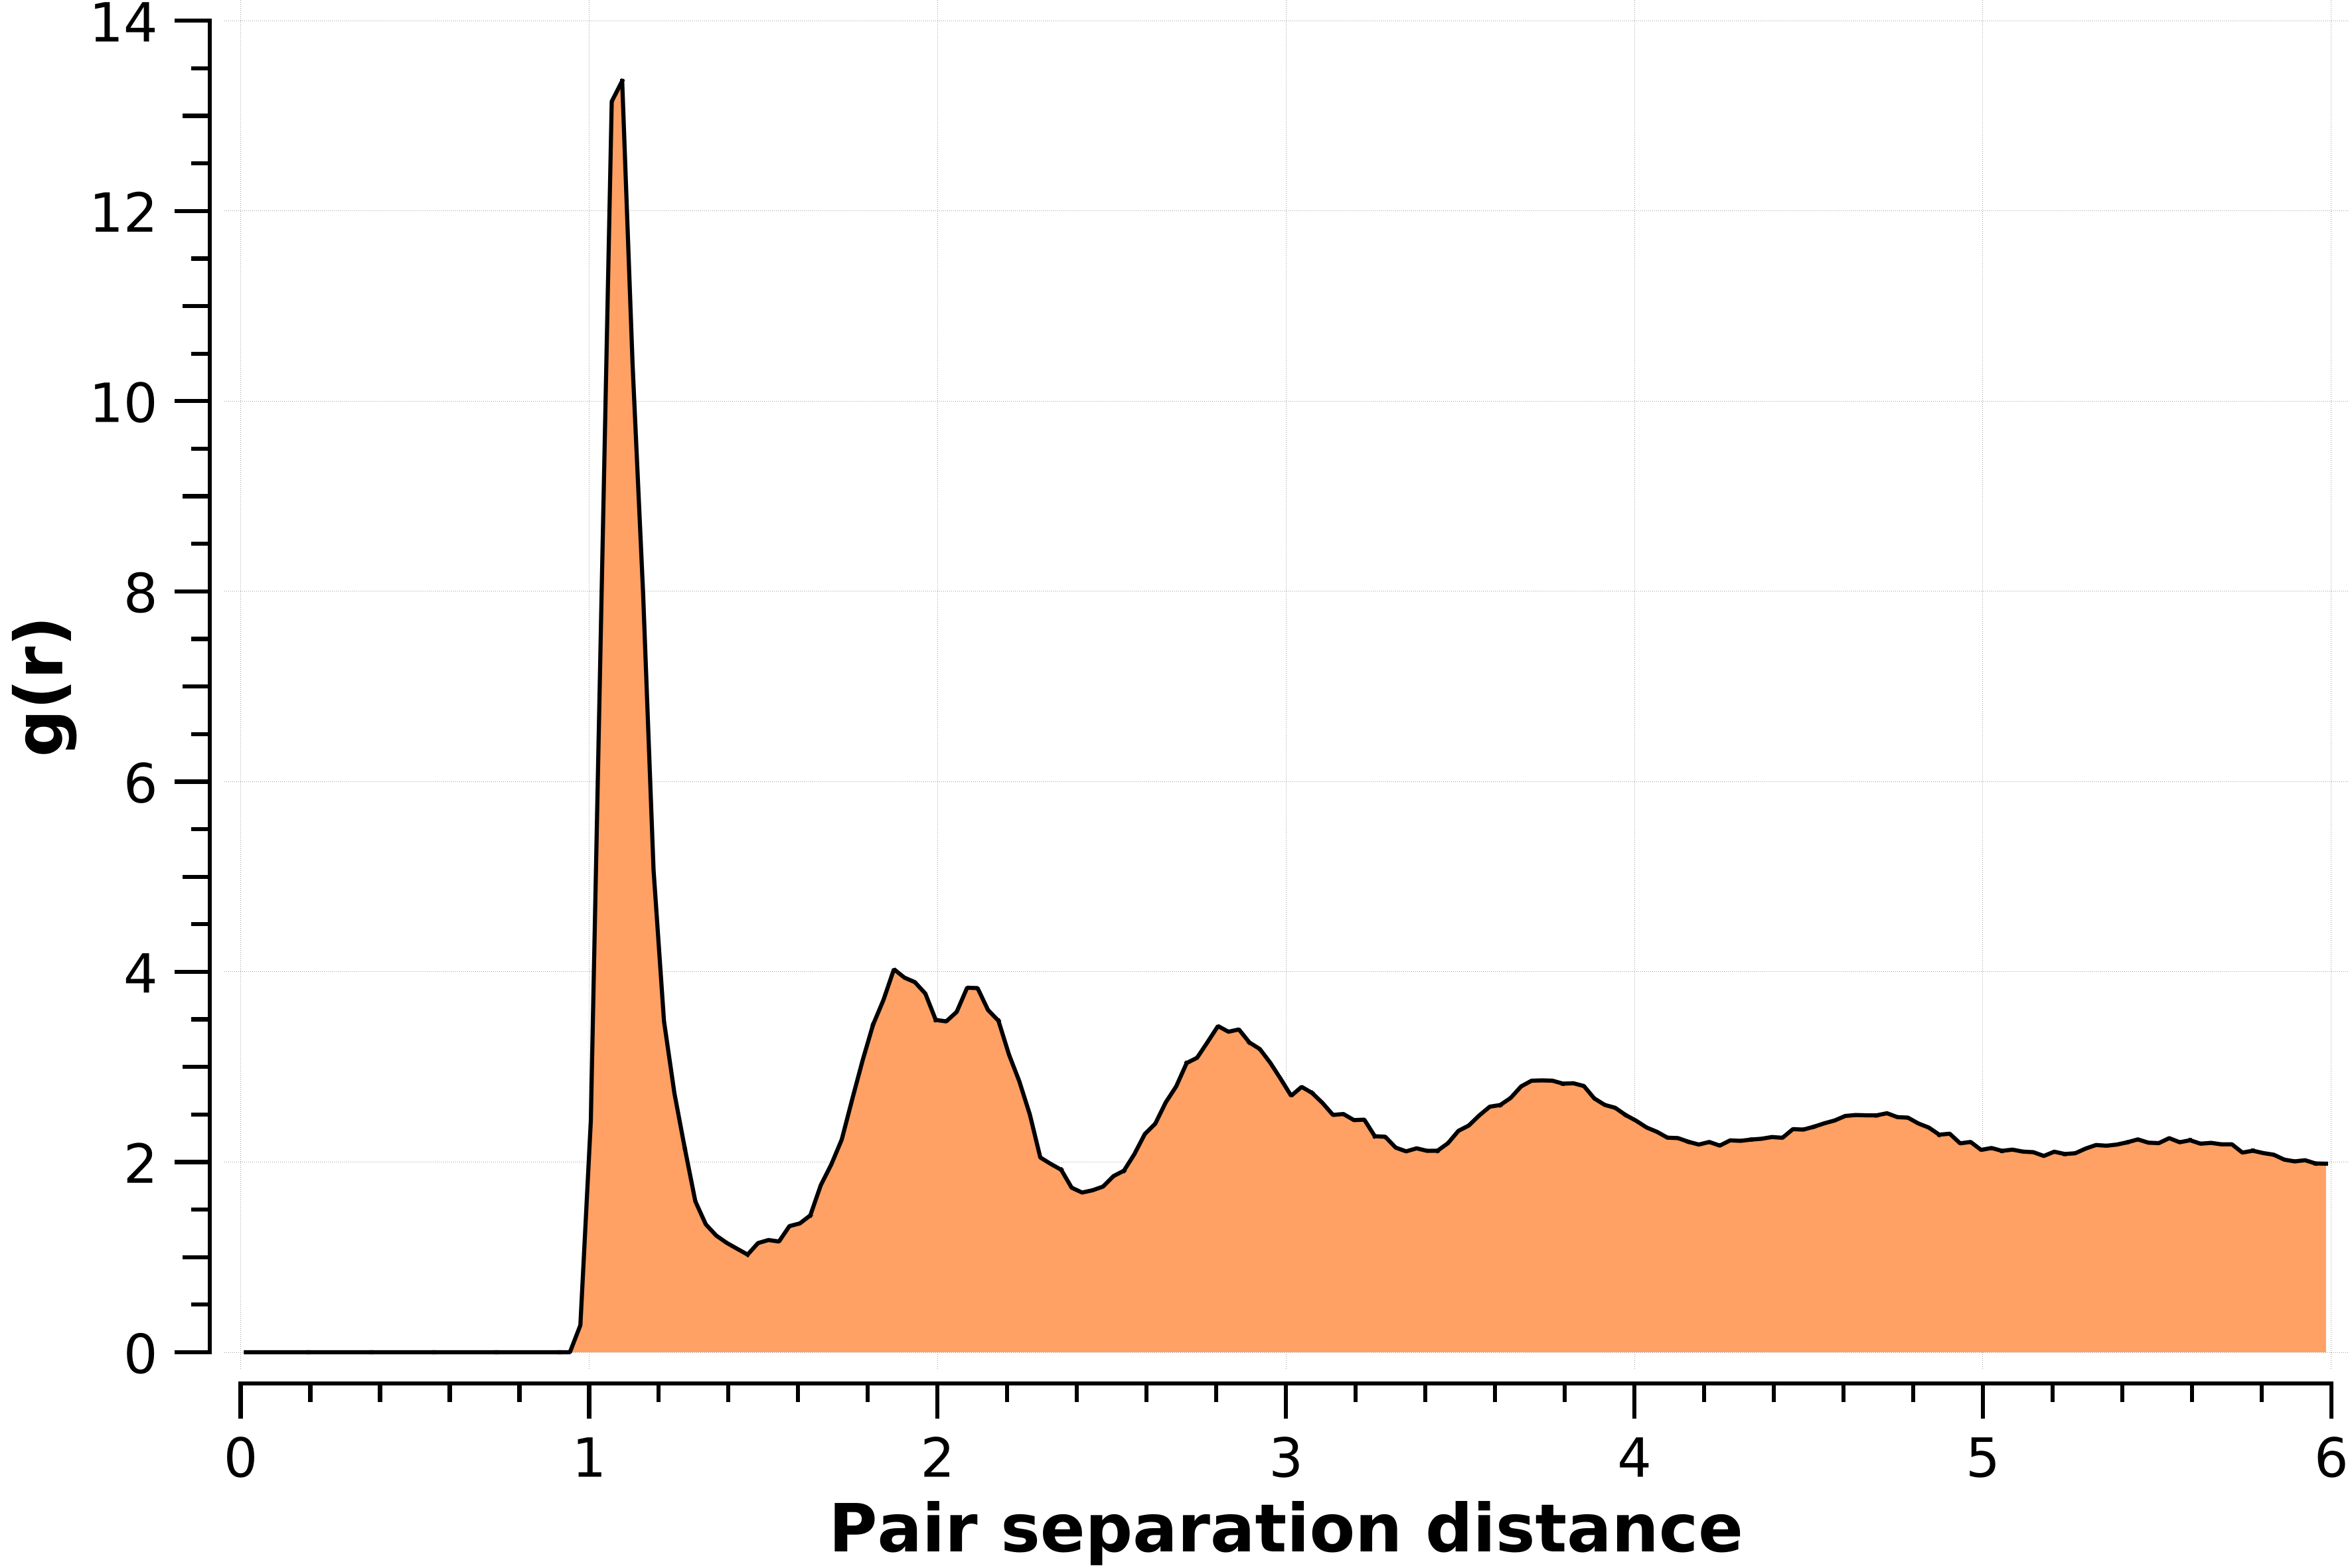

In [7]:
Image("g440.png")

## Теплоемкость
Так же момент перехода в стекло можно определить по калориметрическим критериям. Для этого построим график полной энергии от температуры. На нем виден излом в точке $T_{g} = 1.20$. Это отличается от предыдущего результата, что нормально, так как используется другой критерий.

Построим график теплоемкости. Так как используется масштабировании скоростей, флуктуацией энергии пользоваться неудобно, поэтому посчитаем теплоемкость, как $c_{v}=\frac{\partial E}{\partial T}$. Так как симуляция производится в NVT ансамбле, то полная производная совпадает с частной при фиксированном объеме.

На графике теплоемкости можно выделить переходный участок между $T=0.3$ и $T=1.7$. Значит, на этом участке происходит переход, в течении которого постепенно меняется структура вещества, а предыдущий критерий дал нам точку, в которой переход закончился, так как в нем происходит усреднение $g(r)$ по всему веществу.

Мне не удалось найти статьи, в которых применяется этот критерий для теплоемкости при постоянном объеме, так что проверить этот результат я не могу

In [8]:
en = pd.read_csv("energy.csv")
par = pd.read_csv("params.csv")

In [9]:
E0 = np.array(en["Total"])
E0 = np.append(E0, E0[4998])
T0 = np.array(par["T"])
T0 = np.append(T0, T0[4998])

In [10]:
E = np.mean(E0.reshape(-1, 50), axis=1)
T = np.mean(T0.reshape(-1, 50), axis=1)

In [11]:
cv = [np.polyfit(T[max(0, i-20):min(len(T), i+20)], E[max(0, i-20):min(len(T), i+20)], 1)[0] for i in range(0, len(E))]

In [12]:
a, b = np.polyfit(T[-10:], E[-10:], 1)
c, d = np.polyfit(T[0:10], E[0:10], 1)

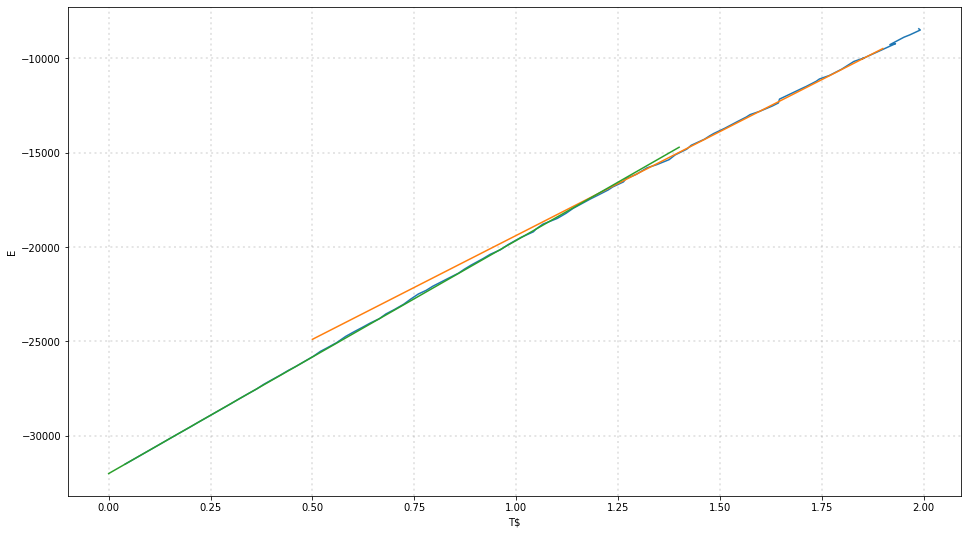

In [14]:
plt.plot(T, E)
plt.plot(np.arange(0.5,2,0.1), c*np.arange(0.5,2,0.1)+d)
plt.plot(np.arange(0,1.5,0.1), a*np.arange(0,1.5,0.1)+b)
plt.rcParams['figure.figsize'] = [16, 9]
plt.grid(b=True, color='Grey', alpha=0.2, linestyle=':', linewidth=2)
plt.xlabel(r"T$")
plt.ylabel("E")
plt.show()

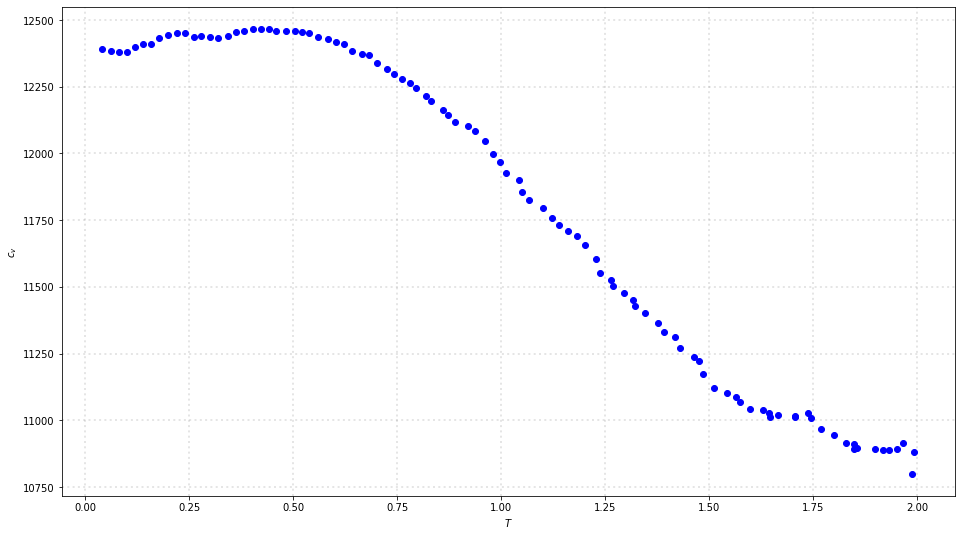

In [15]:
plt.plot(T, cv, "bo")
plt.rcParams['figure.figsize'] = [16, 9]
plt.grid(b=True, color='Grey', alpha=0.2, linestyle=':', linewidth=2)
plt.xlabel(r"$T$")
plt.ylabel(r"$c_{v}$")
plt.show()

## Температура стеклования
По результатам предыдущих пунктов можно сказать, что процесс стеклования начинается при температуре $T_{g}^{start}=1.7$ и заканчивается на температуре $T_{g}^{end}=0.24$.

Структурный критерий дает температуру $T_{g}=0.28$

Калориметрический критерий дает температуру $T_{g}=1.20$